In [1]:
import pandas as pd
import numpy as np
import scipy.stats as si

In [2]:
RF = 0.07 # Riskless rate

In [3]:
# Asset A
mean1 = 0.1 # Exp Return
vol1 = 0.1 # Std Deviation
varia1 = vol1**2 # Variance

In [4]:
# Asset B
mean2 = 0.15 # Exp Return
vol2 = 0.2 # Std Deviation
varia2 = vol2**2 # Variance

In [5]:
Corr = 0.2 # Correlation
cov = vol1*vol2*Corr # Covariance

In [6]:
M_Weight_A = 0.564 # % in Asset A for the Market Portfolio (M)
print("The % in Asset A is:", "{:.2%}".format(M_Weight_A))

The % in Asset A is: 56.40%


## Market Portfolio (M)

In [7]:
M_Weight_B = 1-M_Weight_A # % in Asset B for the Market Portfolio (M)
print("The % in Asset B is:", "{:.2%}".format(M_Weight_B))
M_mean = M_Weight_A*mean1+M_Weight_B*mean2 # Exp return, M
print("The Market Portfolio Exp return is:", "{:.2%}".format(M_mean))
M_vol = np.sqrt((M_Weight_A*vol1)**2+(M_Weight_B*vol2)**2+2*(M_Weight_A*M_Weight_B)*cov) # Volatility, M
print("The Market Portfolio Volatility is:", "{:.2%}".format(M_vol))
ERP = M_mean-RF
print("The Market Portfolio excess return is:", "{:.2%}".format(ERP))

The % in Asset B is: 43.60%
The Market Portfolio Exp return is: 12.18%
The Market Portfolio Volatility is: 11.29%
The Market Portfolio excess return is: 5.18%


# Selected Portfolios (Note they are all on the SML)

In [8]:
Weight_A = [1.6, 1.0, 0.5, M_Weight_A, 0.0, -0.5, -1.0]
Weight_A

[1.6, 1.0, 0.5, 0.564, 0.0, -0.5, -1.0]

In [9]:
Weight_B = []
for i in range(0,len(Weight_A)):
    Weight_B.append(1-Weight_A[i])
Weight_B    

[-0.6000000000000001, 0.0, 0.5, 0.43600000000000005, 1.0, 1.5, 2.0]

In [10]:
COVA = []
for i in range(0,len(Weight_A)):
    COVA.append(Weight_A[i]*M_Weight_A*varia1+Weight_B[i]*M_Weight_B*varia2+(Weight_A[i]*M_Weight_B+Weight_B[i]*M_Weight_A)*cov)
COVA    

[-3.2000000000031135e-06,
 0.007384000000000002,
 0.013540000000000002,
 0.012752032000000005,
 0.019696000000000005,
 0.02585200000000001,
 0.03200800000000001]

In [11]:
BETA = []
for i in range(0,len(Weight_A)):
    BETA.append(COVA[i]/M_vol**2)
BETA    

[-0.00025094039914604294,
 0.5790449710289308,
 1.0617915638856612,
 1.0,
 1.544538156742392,
 2.0272847495991226,
 2.510031342455853]

In [12]:
SML = []
for i in range(0,len(Weight_A)):
    SML.append(RF+BETA[i]*ERP)
SML    

[0.06998700128732424,
 0.09999452949929862,
 0.12500080300927724,
 0.12179999999999999,
 0.15000707651925588,
 0.17501335002923452,
 0.20001962353921315]

In [13]:
Expected = []
for i in range(0,len(Weight_A)):
    Expected.append(Weight_A[i]*mean1 + Weight_B[i]*mean2)
Expected

[0.07000000000000002,
 0.1,
 0.125,
 0.12179999999999999,
 0.15,
 0.175,
 0.19999999999999998]

In [14]:
df = pd.DataFrame({"Asset A": Weight_A, "Asset B":Weight_B, "Covariance (Port, Market)":COVA, "Beta":BETA, "SML": SML, "Expected Return": Expected})
df

,Asset A,Asset B,"Covariance (Port, Market)",Beta,SML,Expected Return
0,1.600,-0.600,-0.000003,-0.000251,0.069987,0.0700
1,1.000,0.000,0.007384,0.579045,0.099995,0.1000
2,0.500,0.500,0.013540,1.061792,0.125001,0.1250
3,0.564,0.436,0.012752,1.000000,0.121800,0.1218
4,0.000,1.000,0.019696,1.544538,0.150007,0.1500
5,-0.500,1.500,0.025852,2.027285,0.175013,0.1750
6,-1.000,2.000,0.032008,2.510031,0.200020,0.2000


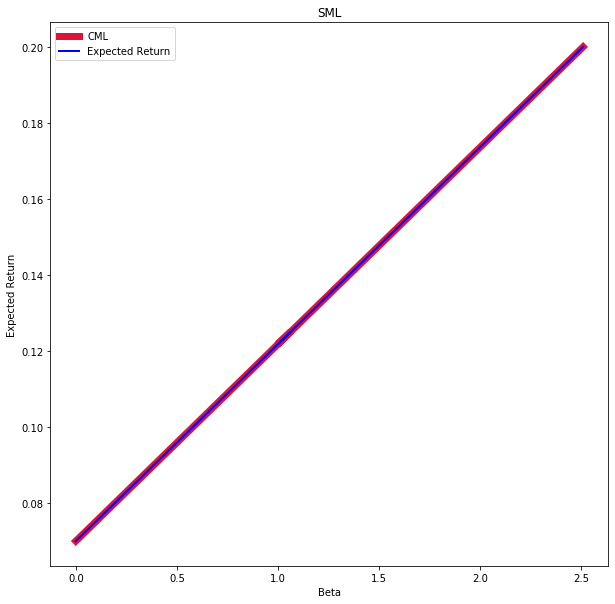

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
SML1 = plt.plot(df['Beta'], df['SML'], label='CML', color = 'crimson', linewidth = 7.0)
ER = plt.plot(df['Beta'], df['SML'], label='Expected Return', color = 'blue', linewidth = 2.0)
plt.title('SML')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.legend()
plt.show()